In [29]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

mcmc = pickle.load(open('../model/SLR_basic_12000.pkl','rb'))
params={'beta0':-1, 'beta1':1, 'mu_x':0.5, 's2_x':1/36, 's2_ep':1, 's2_v':1/36, 's2_d':1/100}
heights = {'beta0':14, 'beta1':350,'s2_ep':30}
# heights={'beta0':8, 'beta1':10, 'mu_x':10, 's2_x':3, 's2_ep':1, 's2_v':3, 's2_d':3}

beta0 = mcmc.act_params['beta0']
beta1 = mcmc.act_params['beta1']

s2_ep = mcmc.act_params['s2_ep']

n = 120
np.random.seed(1)
ep = np.random.normal(0, np.sqrt(s2_ep), n)
# observed
x = np.random.uniform(10, 40, n)
y = beta0 + beta1*x + ep

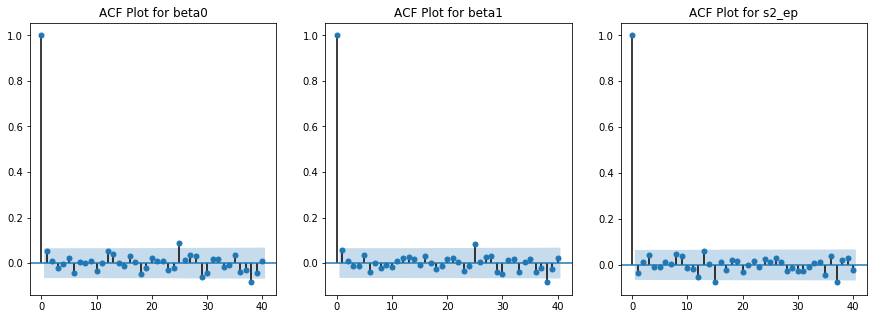

In [30]:
burnin = 1000
thinning = 10

fig, ax = plt.subplots(1,3,figsize=(15,5))
a = 0
for i in range(3):

    key = list(mcmc.params.keys())[a]
    plot_acf(np.array(mcmc.params[key])[burnin::thinning], lags=40, ax=ax[i])
    ax[i].set_title(f'ACF Plot for {key}')
            
    a += 1
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.12/autocorr.png')
plt.show()

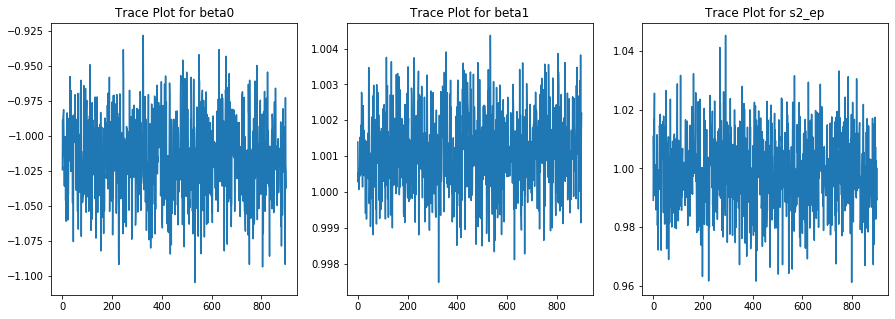

In [31]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
a = 0
for i in range(3):
    key = list(mcmc.params.keys())[a]
    ax[i].plot(mcmc.params[key][burnin::thinning])
    ax[i].set_title(f'Trace Plot for {key}')
    a += 1
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.12/traceplot.png')
plt.show()

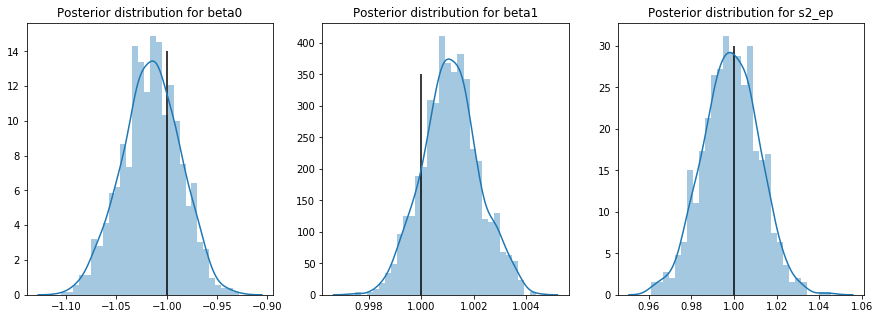

In [34]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
a = 0
for i in range(3):
    key = list(mcmc.params.keys())[a]
    sns.distplot(mcmc.params[key][burnin::thinning], ax=ax[i], norm_hist=True, bins=30)
    ax[i].vlines(params[key] ,0, heights[key])
    ax[i].set_title(f'Posterior distribution for {key}')

    a += 1
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.19/density_12000.png')
plt.show()

In [33]:
print(f'beta0: {np.median(mcmc.params["beta0"])}')
print(f'beta1: {np.median(mcmc.params["beta1"])}')
print(f's2_ep: {np.median(mcmc.params["s2_ep"])}')

beta0: -1.0163249613783867
beta1: 1.001120137845756
s2_ep: 0.9990976245078484


In [19]:
def credible_interval(x, alpha):
    n = len(x)
    sided = int(alpha/2 * n)
    x = sorted(list(x))
    
    lower = x[sided]
    upper = x[n-sided]
    return round(lower,3),round(upper,3)

In [20]:
print('====================== 95% credible interval for each parameter ======================')
params_name = mcmc.params.keys()
for n in params_name:
    
    if n == 'x':
        for i in range(3):
            lower, upper = credible_interval(mcmc.params[n][i,:][burnin::thinning], 0.05)
            print(f'{n}[{i}]:  {lower},  {upper}')
    else:
        lower, upper = credible_interval(mcmc.params[n][burnin::thinning], 0.05)
        print(f'{n}:  {lower},  {upper}')

====================== 95% credible interval for each parameter ======================
beta0:  -1.439,  -0.403
beta1:  0.98,  1.017
s2_ep:  0.615,  1.023


In [98]:
mode_result = pickle.load(open('../model/MC_SIMUL_SLR.pkl','rb'))
true_val = {'beta0':-1, 'beta1':1, 's2_ep':1}
params = ['beta0', 'beta1', 's2_ep']
B = len(mode_result['beta0'])
for param in params:
    sd = np.std(mode_result[param])
    mu = np.mean(mode_result[param])
    stat = (mu - true_val[param])/sd * np.sqrt(B)
    print(f'{param} MC Simulation Result')
    print(f'mu: {mu}')
    print(f'sd: {sd}')
    print(f'test statistic: {stat}\n')

beta0 MC Simulation Result
mu: -0.9932579066978892
sd: 0.27519811999676985
test statistic: 0.774728077077206

beta1 MC Simulation Result
mu: 0.999796047419091
sd: 0.010491166528522973
test statistic: -0.6147597491553685

s2_ep MC Simulation Result
mu: 0.9831536989049844
sd: 0.1245881602468759
test statistic: -4.275902421520332



In [95]:
mode_result

{'beta0': [0.03958885857805006,
  0.013220082879504158,
  0.02719472205367124,
  -0.004832404867048834,
  -0.031445789108557665,
  0.046793779551706494,
  0.026507104089295574,
  0.013627527270774209,
  -0.04295215955678944,
  -0.011548678835398896,
  0.04332548464492603,
  -0.10752060361236171,
  0.0647397268889579,
  -0.07447767092405189,
  0.04219634577785869,
  0.007646621082713523,
  0.003450023414177439,
  0.045554333306275674,
  -0.012079793734748434,
  -0.030844412037090763,
  0.051607811987985475,
  -0.011186128416320495,
  0.036694933003698305,
  0.023088344191493193,
  0.045703431302011044,
  0.027856163682721813,
  -0.02353632778455217,
  -0.019871936228550324,
  0.001072132940372894,
  0.02684386512986392,
  -0.03209568893663428,
  -0.0016241208941012442,
  0.009156957504594554,
  0.05345995355262745,
  0.03191607131270702,
  0.05261305347802514,
  -0.03131851044687495,
  0.009888761175142036,
  0.04497772707328507,
  -0.023648024275133017,
  -0.08263465109654833,
  0.0035

In [82]:
len(mode_result['s2_ep'])

1000